# Base model

*Synopsis*: At the start of each game, effort (energy) reserves are realized for both the team and the field. Score-difference at the end of the third quarter (*advantage*) is probabilistically determined as a function of effort exerted by both teams during those quarters. At the beginning of the fourth quarter (Q4), the coach has to decide between how much more effort (energy) to have their players exert in the current game; and how much to save for future games; as a function of the advantage at the beginning of Q4. Effort reserves for the team and the field are replenished (stochastically) before the start of the next game. The coach's goal is to maximize the expected sum of winning in the whole season.

Findings: As one would perhaps expect, initial conditions are theoretically shown to be inconsequential in a long season: visualizing simulation results confirm the same.  The **Expected Win Rate (EWR)**, which is defined as “the average expected *value* (or, *winning probability*) in games remaining” and the optimal strategies are presented in detail. Visualizing optimal strategies from the simulations show that the manager finds it optimal to save energy throughout most of the season. The optimal strategies (i.e., energy saved) do not show noticeable difference across different stages of the league.

---

# 1. Formal model description
Let $T$ denote the number of games that the **team** is scheduled to play in the season. The sequence of opponents that the coach faces over the entire season is collectively modelled as the **field**.
At the start of each *game*, **effort-reserves** are realized for both the team and the field, denoted respectively by $e^P$ and $e^F$. **Score-difference**  at the end of the third quarter (henceforth **advantage**, denoted by $A$) is probabilistically determined as a function of effort exerted by the teams throughout the first three quarters combined.

What happens “late” in the game is salient in our model, and we assume that an exogenously given constant fraction $\alpha$ of the effort reserve is used up by the team throughout the first three quarters combined. In a similar way, the field is assumed to expend $\beta$ fraction of its energy reserve throughout the first three quarters combined. Moreover, the field does not behave strategically in Q4 and therefore uses the remaining $(1-\beta)$ fraction in Q4. 


At the beginning of the fourth quarter (Q4), the coach has to decide between how much more effort to have his players exert in the current game; and how much to save for future games; as a function of the *advantage* at the beginning of Q4 and the effort reserve of the field. Effort reserves are  replenished (stochastically) before the start of the next game. If there are no savings made in the current game, effort-reserve in the next game is continuously distributed with density $g$. If a saving of $r$ is made in the current game, the effort reserve in the next game is drawn from a distribution with density $\mu(.|r)$, with more savings leading to the effort reserve in the next game being drawn from a better distribution, in a first order stochastic dominance sense.  The coach's goal is to maximize the sum of stage rewards (winning probabilities in every game) across the whole season.


We model decisions as a discrete-time finite-horizon Markov Decision Process consisting of the following components. $T$ denotes the number of games  to be played by the team in the season and is indexed by $t$. Throughout the article, we will use the terms *game(s)* and *period(s)* to mean the same thing. Also, note that *period* is often used to refer to a quarter in basketball, but we always use it in the context of dynamic programming. The **state** variable in every game $ t $ is a triple $s_t = (e^F_{t}, e^P_{t}, \,A_{t})$ where effort reserves $e^F_t,$ $e^P_t \in [0,1]$; advantage at the start of Q4, $A_t \in \{-3p,... ,0 ,..., 3p\}$ where, $p > 0$ denotes the maximum possible point (score) difference between teams in a quarter. The assumption of maximum score difference $p$ is made for simplicity. While there is no such score difference, in practice there would be: it is  rare for an NBA team to outscore the other by more than 20 more points in a quarter. Positive value of $A_t$ means the  team is ahead at the start of Q4. The **state space** is denoted by $ S = [0,1]\times[0,1]\times \{-3p, \cdots,3p\}$.  The effort spent by the team throughout the first three quarters combined  is $ \alpha e^{P} $, where $\alpha$ is an exogenous parameter.  The **control** variable $ x_{t} \leq (1-\alpha)e^P_t$ denotes the effort exerted by the team in the fourth quarter (Q4) in game $ t $. Finally, $r_t (x_t)$ = $(1-\alpha)e^P_t - x_t$ denotes the effort saved in game $t$. The season starts with energy reserves $e_1^P$ and $e_1^F$,   and an *advantage* $A_{1} $ (distributed on $\{-3p,... ,0 ,..., 3p\}$ with  mass function $\eta( \;. \; | \;\; \beta e^{F}_{1},\; \alpha e^{P}_{1}) $) which is realized before the coach takes an action. 


#### Stage reward
The team wins game $t$ if the cumulative score difference after Q4 is positive.  The score difference in Q4 is stochastically determined as a function of effort choices by the team and the field in Q4. Formally, the stage reward for the team is simply  the probability of winning the game as a function of the state and the control:

$$
R(s_t , x_t) =
\begin{cases}
P\big[X_4 + A_t > 0\big] + \frac{1}{2}P[ X_4 + A_t = 0 ]    &,\; A_t \;\in \; \{-p, -p+1, ... , p\}  \\
1 &,\; A_t \;\in \;\{p+1, p+2, ... , 3p \}  \\
0 &,\; A_t \;\in \; \{-3p, -3p+1, ... , -(p+1) \}  \\
\end{cases}
$$

where, **$X_4$** denotes the score difference in Q4 and is discretely distributed on  $\{-p,... ,0 ,..., p\}$ with probability mass function  $\rho( \;. \; | \; x_t , (1-\beta) e^{F}_t) $

Note, the way the field uses its remaining energy in Q4 is embedded in $\rho$. Also note that, if the cumulative scores are tied at the end of $Q4$, there is a probability of half for the team to win. The tie-breaker can be a result of, for instance, the game going into overtime, with the teams evenly matched.

The state of the system at period $ t+1 $ depends on action $ x_{t} $ and a random shock unknown at period $ t $ as under:

- $ e^F_{t+1}$ is continuously distributed on $[0,1]$ with density $g$
-  $ e^P_{t+1}$ is continuously distributed on $[0,1]$ with density $\mu( \; . \; | \; r_t(x_t))$
- $  A_{t+1} $ is  distributed on $\{-3p,... ,0 ,..., 3p\}$ with  mass  $\eta( \;. \; | \;\; \beta e^{F}_{t+1},\; \alpha e^{P}_{t+1}) $ 

---

**Summary of notations**

| Notation | Definition                               |
|:--------:|-----------------------------------------|
|    $T$   | The total number of games in the season. |
| $e^P$    | Effort reserve of the team.              |
| $e^F$    | Effort reserve of the field.             |
|  $A$     | Advantage (score-difference) at the start of $Q4$. Positive value indicates that the team is ahead.|    
| $p$ |  A feasible maximum possible point (score) difference between the teams in a quarter. |
| $s$ | A triple denoting the state, $s = (e^F, e^P, \,A)$. |
| $S$ | State space, $ S = [0,1]\times[0,1]\times \{-3p, \cdots,3p\}$.|
|$\alpha$ | Fraction of effort reserve spent by the team throughout the first three quarters combined. |
| $\beta$ | Fraction of effort reserve spent by the field throughout the first three quarters combined. |
| $\eta( \cdot \| \cdot, \cdot )$ | Mass with which advantage (A) at the start of $Q4$ distributes, given effort reserves for both the team and the field at the start of the game. |
| $x$ | Effort exerted by the team in $Q4$. |
| $r$ | Effort saved by the team in $Q4$. |
| $g(\cdot)$ | Density with which effort reserve in the next game  distributes, if no saving is made in current game.|
| $\mu( \cdot \| r )$ | Density with which effort reserve in the next game  distributes, if a saving of $r$ is made in current game.  |
| $\rho(\cdot  \|  \cdot , \cdot )$ | Mass with which score-difference ($X_4$) in $Q4$ is distributed, given effort choices by the team and the field at $Q4$.|

---
### The (Bellman) maximization problem that the Coach needs to solve
Let $ V_t(s) $ denote the value function capturing the maximum attainable sum of current and expected future rewards given that the system is in state $s  = (e^F, e^P, \,A)$ in game $t$. Recall that,  $ S = [0,1]\times[0,1]\times \{-3p, \cdots,3p\}$ denotes the state space. Then, the principle of optimality implies that the value functions $V_t : S \rightarrow \mathbb{R}$ must satisfy the **Bellman** equations :

$$
	V_t(s) = \max_{x} \bigg[ R(s, x) + \int  \int \big\{ \sum_a V_{t+1}(e^{P}, e^{F}, a) \eta( \;a \; | \;\alpha e^{P}, \beta e^{F}) \big\} \;g(de^F)   \mu(de^P | r(x)) \bigg]
$$
for all $s \in S $ and $ t = 1, 2, ..., T. $

The tournament ends after *game* $T$, therefore we have: $$ V_{T+1}(s) = 0 \hspace{5mm}\forall \hspace{2mm} s \in S $$

---

---

# 2. Analysis and results
The optimization problem described above is solved computationally. We make specific choices for the previously described probability distributions governing the process. These, along with the particular choice of all parameters of the model are presented below:

- Total number of games, T = 80
- Effort reserve of *field*, $e^F$ $\; \sim \;$ Uniform $(0,1)$ 
- Effort reserve of *team*, $e^P$ $\; \sim \;$ Uniform $(r, 1)$ when saving in previous game is $r$ 
- Maximum absolute score difference in each quarter, $p \;= \;10$.
- Fraction of total effort that the team uses in the first three quarters, $\alpha \;=\; 0.7$
- Field divides available effort reserve equally across all four quarters in every game. Therefore, $\beta = 0.75$.
- Advantage (A) to team at the start of $Q4$ follows a binomial distribution with support $\{-30,-29,... , 0 ,... , 29, 30\}$ :
    - $A \; \sim \; $ Binomial $ \bigg(60, \frac{\alpha e^P}{\alpha e^P+ \beta e^F}\bigg) \; - \; 30$  
- Score-difference in the fourth quarter ($X_4$) given effort exerted by the team in Q4 is $x$,  follows a binomial distribution with support $\{-10, \cdots , 0 , \cdots , 10\}$):   
    - $X_4 \;\sim \;$ Binomial$ \bigg(20, \frac{x}{\;\;x \;+ \;(1-\beta)e^F \;\;}\bigg) \; - \; 10 $ 




The maximization problem presented above is solved by **backward induction**. In order to facilitate computation, we discretize the state space. The domain of *effort reserves* $[0,1]$ for both the team and the field is discretized to $100$ equispaced points. The third state component *advantage* is already discrete to begin with, ranging between $(3\times2p) + 1 \; = \; 61 $ distinct values. Together this makes up the required $100 \times 100 \times 61$ grid points. 


 The recursion algorithm is structured as a series of three nested loops. The outer loop involves the backward recursion over  *game*; the middle loop involves visits to each state (grid point); and the inner loop involves visits to each possible action (effort saved in the current game) to eventually evaluate the best action.
 
 ---


In [149]:
### Package imports 

import numpy as np
from scipy.stats import binom
import math
import matplotlib.pyplot as plt
import time 

####   Preliminary HELPER functions  that will be used in the Bellman optimization

Define $G := A + 30$,  where $A$ is the *advantage* at the start of Q4 as defined in formal model above.

$A$ ranges from -30 to 30, and consequently,  $G$ ranges from $0$ to $60$. 

Since I am going to use 'binom'  from *scipy.stats*, this 
transformation will be useful. One could alternatively make the necessary transformation directly at appropriate places 
without defing this new variable. 

In [159]:
###################################################################################################################################
################################################## STAGE REWARD ###################################################################
######################## Prob[X_4 > 10 - G] where X_4 follows Binomial(20, e_p / (e_p + e_f))   ###################################
########################               Input G lies between {-30,....,30}                       ###################################
###################################################################################################################################


def reward(G, y, x):
    N = 20
    if x == 0.0 and y == 0.0:
        x = 1.0
        y = 1.0
    if G == -10:
        return binom.pmf(20, N, x/(x+y))/2.0
    
    elif G == 10:
        return (1.0 - binom.pmf(0, N, x/(x+y))/2.0 ) ### P(X_4 > 0) + 1/2*P[X_4 = 0]
    
    elif np.isin(G, np.linspace(-9, 9,19)):
        return (1.0 -   binom.cdf(10 - G, N, x/(x+y)) + binom.pmf(10 - G, N, x/(x+y))/2.0) 
    
    elif np.isin(G, np.linspace(-30, -11,20)):
        return 0.0
    else:
        return 1.0
    

In [160]:
###################################################################################################################################
###################################################################################################################################
########   This function makes Evaluation of Expected Value at t+1 cleaner and faster.                        #####################
########   Takes as INPUT P[:,:,:] and V[t+1, :,:,:] : the value array for period t+1.(used in the Bellman)   #####################
########   OUTPUTS a 2D array.  Dimensions corresponding to E_f and E_p.                                      #####################
########   The (i, j)th cell value is the expected value where the expectation is taken over G.               #####################
########   G follows Bin(60,f(E_p)/(f(E_p)+g(E_f)))                                                           #####################
###################################################################################################################################
###################################################################################################################################

def expected_value_given_Ef_and_Ep(x,p):
    (g,e_f, e_p) = x.shape
    output = np.zeros((e_f,e_p))
    for i in range(0,e_p):
        for j in range(0,e_f):
            output[j,i] = sum(x[:,j,i]*p[:,j,i])
    return(output)

In [ ]:
### Effort-usage funtions 

In [161]:
def team(x,alpha):
    a = alpha
    return(a*x)

In [162]:
def field(x,beta):
    b = beta
    return(beta*x)

In [163]:
def effort(x,y):
    if y == 0:
        return(0)
    else:
        return(x/y)

In [164]:
#################################################################################################################################
#####################################  Value Matrix and other array Initialization  #############################################
#################################################################################################################################
T = 80
G = 61

num_of_states_E_f = 100    ## number of effort_grid_points
num_of_states_E_p = 100    ## number of effort_grid_points

V = np.zeros((T+2,G,num_of_states_E_f,num_of_states_E_p))  
strategy = np.zeros((T+2,G,num_of_states_E_f,num_of_states_E_p))  

In [165]:
################################################################################################################################
#############   Distribution of G as a function of (E_f, E_p)   : G follows Bin(60, f(E_p)/f(E_p)+g(E_f)) - 30  ################ 
################################################################################################################################
s_0 = 0.0
s_n = 1.0
alpha = 0.7/3.0 ### team spends 3*alpha*E_p in the first 3quarters. (roughly the same as field per quarter for first 3 Quarters.)
beta = 1/4.0    ### field spends beta*E_f every quarter.
## Note that 'alpha' and 'beta' are not exactly defined in the same way as in the formal model description. Here 'alpha' & 'beta' 
## are, respectively, the fraction of effort used by the team and the field "per-quarter" in the first three quarters.

E_f = np.linspace(s_0, s_n, num = num_of_states_E_f)
E_p = np.linspace(s_0, s_n, num = num_of_states_E_p)


#################################################################################################################################
################################################   PROBABILITY CUBE   ###########################################################
##########################   given E_f and E_p, P[:,e_f, e_p ] gives the mass on each value of G.  ##############################
#############   This is going to be heavily used everytime while computing the expectation term in the Bellman  ################
#################################################################################################################################

P = np.zeros((G, num_of_states_E_f, num_of_states_E_p)) ## P = np.zeros((G, E_f, E_p))

for i in range(0,len(E_p)):
    i_used = int(np.around(3.0*alpha*i))
    for j in range(0, len(E_f)):
        if i == 0 :
            if j == 0:
                p = 0.5
            else :
                p = 0.0
        else:
            p = E_p[i_used]/(E_p[i_used]+field(E_f[j],3.0*beta))
            
        for g in range(0, 61):
            P[g,j, i] = binom.pmf(g, 60, p)

In [166]:
#################################################################################################################################
##############################################  Evaluation of Value at T ########################################################
#################################################################################################################################

for i in range(0,len(E_p)):
    for j in range(0,len(E_f)):
        for g in range(0, 61):
            V[T,g,j,i] = reward((g-30),(beta)*E_f[j], (1.0 - 3.0*alpha)*E_p[i])  

##### Recall that field spends 3*beta*E_f in first 3Q and beta*E_f in the Q4  
##### Team spends everything in the last quarter since V_{T+1} = 0.

---
#### Backward Induction  (Bellman)

In [180]:
#################################################################################################################################
#########################################     Backward Induction  (Bellman)    ##################################################
#################################################################################################################################

for t in range(T-1,0,-1):  ## Loop over 'games' in the season (backwards) 
#     print (time.ctime(), " t = ",t)
    expected_value_over_G = expected_value_given_Ef_and_Ep( V[t+1,:,:,:], P )  
    
    for i in range(0,len(E_p)):  ## Loop over TEAM effort levels 
        loc_available_Q4 = int(i - np.around(3.0*alpha*i))
        
        for j in range(0, len(E_f)):  ## Loop over FIELD effort levels
            for g in range(0, 61):     ## loop over all possible 'advantage'             
                Y = np.zeros(loc_available_Q4 + 1)
                
                for i_hat in range(0,loc_available_Q4 +1):       # i_hat loops over available effort grid
                    Y[i_hat] = reward(g-30,field(E_f[j],beta),E_p[i_hat]) + (expected_value_over_G[:, (loc_available_Q4 - i_hat):].sum())*(1/len(E_f))*(1/len(E_p[(loc_available_Q4 - i_hat):]))                  
                V[t,g,j,i] = np.max(Y)
                strategy[t,g,j,i] = E_p[np.argmax(Y)]
                                   
print('\n Voila!')  


 Voila!


**The partially-visible line of code in the code-block above is as follows:**
```python
Y[i_hat] = reward(g-30,field(E_f[j],beta),E_p[i_hat]) + 
(expected_value_over_G[:, (loc_available_Q4 - i_hat):].sum())*(1/len(E_f))*(1/len(E_p[(loc_available_Q4 - i_hat):]))                
```



---

## 2.1 Visualizing results

Next, let us visualize the model that we have solved. To begin with, we look at the *Expected Win Rate (EWR)* and *Optimal Strategies* at five different stages of the league for game number up to 70). Following this, we will specifically look at the *End Season*, i.e., games 75-79.




In [168]:
from numpy import *
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [169]:
##### Helper function to be used in the visualizations  #####
def my_surface_plot(axis, x, y, z, label_to_use):
    c = axis.plot_surface(x, y, z, label=label_to_use)
    c._facecolors2d=c._facecolors3d
    c._edgecolors2d=c._edgecolors3d
    return 

---
### *Expected Win Rate (EWR)*
**(For games 10 through to 70)**

---

For every state $s \in S$, the Expected Win Rate ($EWR$) in games remaining at period $t$ is given by the expression $\frac{V_t(s)}{T - t +1}$. 

In the figure below, we visualize EWR at three different **advantage** scenarios: 
- The team is **ahead** at the start of Q4, i.e., the score-difference is in favour of the team.
- The scores are **even** at the start of Q4.
- The team is **behind** at the start of Q4, i.e., the score-difference is in favour of the field.



<IPython.core.display.Javascript object>


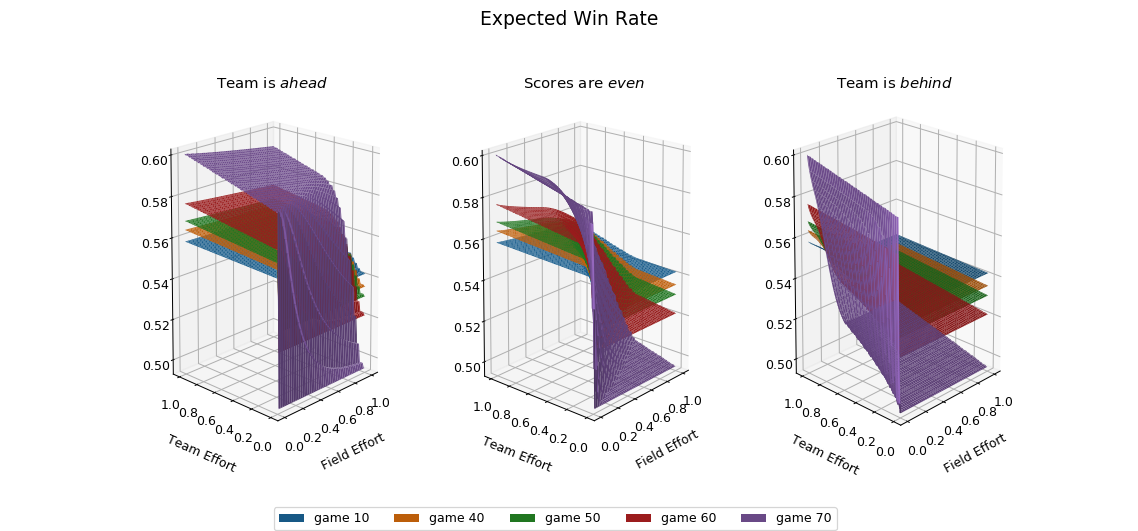

In [174]:
games = [10, 40, 50, 60, 70]   ## Array consisting of the games to be plotted. A game correspond to the variable 't' in the model.
adv_ahead , adv_even, adv_behind = 37, 30, 23     ## three advantage scenarios

x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## Advantage: AHEAD
axis_ahead = fig.add_subplot(131,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
axis_ahead.set_title('Team is $ahead$')
for game in games:
    EWR = V[game,adv_ahead,x,y]/(T - game +1)
    my_surface_plot(axis_ahead, E_f[x], E_p[y], EWR, "t = {}".format(game))

## Advantage: EVEN
axis_even = fig.add_subplot(132,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    EWR = V[game,adv_even,x,y]/(T - game +1)
    my_surface_plot(axis_even, E_f[x], E_p[y], EWR, "game {}".format(game))
axis_even.set_title('Scores are $even$')
axis_even.legend(ncol=5, bbox_to_anchor=(1.5, -0.07),  loc = 'best')

## Advantage: BEHIND
axis_behind = fig.add_subplot(133,projection='3d', xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    EWR = V[game,adv_behind,x,y]/(T - game +1)
    my_surface_plot(axis_behind, E_f[x], E_p[y], EWR, "t = {}".format(game))
axis_behind.set_title('Team is $behind$')

fig.suptitle('Expected Win Rate', fontsize=15)

plt.show()


**Remarks:**
- The range of EWR shrinks as we go earlier in the season. 
- When the team is well *ahead* or *behind* at the start of Q4,  EWR does not change significantly with respect to the  strength difference between the teams; except in the case when, either the team or the field starts with a very low reserve (close to zero). It is rather the time in the season that matters more. The value of being  ahead (resp., behind) at the start of Q4, increases (resp., decreases) when there are fewer games remaining .
-  If scores are *even* at the start of Q4,  the strength difference between the teams plays  a role in determining EWR. Starting the game as the relatively stronger team is more valuable when there are fewer games remaining. On the other hand, the value of  starting as the relatively weaker team gets increasingly worse as one proceeds through the season.


---
###    *Optimal Strategy (effort_usage at Q4)*
**(For games 10 through to 70 )**

---

From the optimal strategy obtained from the solution of the maximization problem above, we visualize below the **optimal effort usage in Q4** of the *team* as a function of its own effort level and the *field*'s effort level, for three different **advantage** scenarios that the team may find itself at the start of $Q4$: 
- The team is **ahead** at the start of Q4, i.e., the score-difference is in favour of the team.
- The scores are **even** at the start of Q4.
- The team is **behind** at the start of Q4, i.e., the score-difference is in favour of the field.

Note that the range of the $z-axis$ in the figure below is up to $0.30$. This is because the team has spent $\alpha e^P$ ($\alpha = 0.70$) in the first three quarters.

<IPython.core.display.Javascript object>


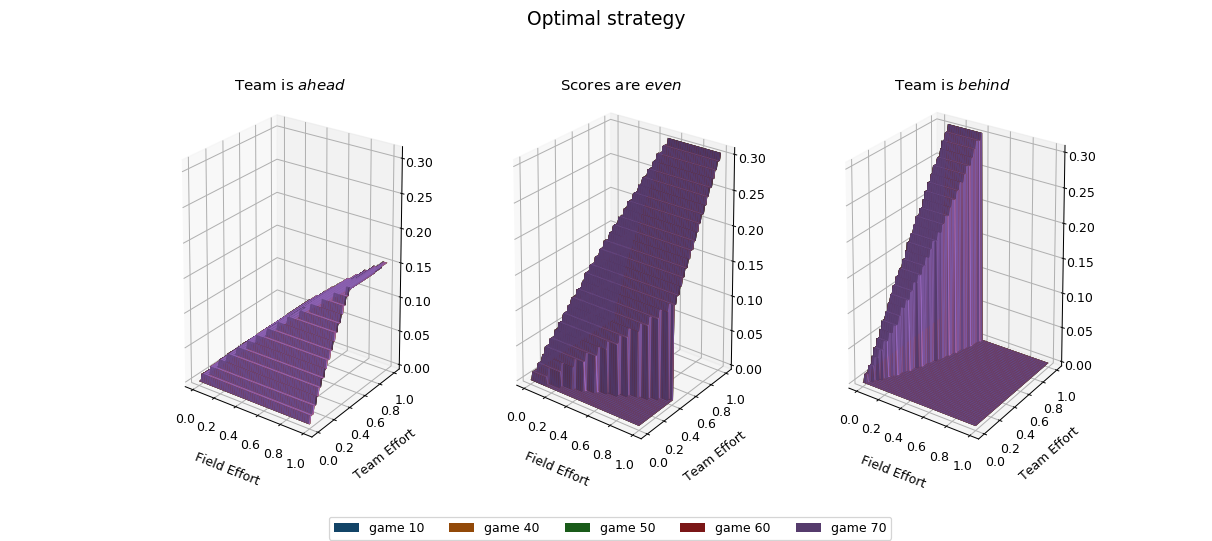

In [179]:
games = [10, 40, 50, 60, 70]   ## Array consisting of the games to be plotted. A game correspond to the variable 't' in the model.
adv_ahead , adv_even, adv_behind = 37, 30, 23     ## three advantage scenarios

x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## Advantage: AHEAD
axis_ahead = fig.add_subplot(131,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
axis_ahead.set_title('Team is $ahead$')
for game in games:
    opt_strategy = strategy[game,adv_ahead,x,y]
    my_surface_plot(axis_ahead, E_f[x], E_p[y], opt_strategy, "t = {}".format(game))
axis_ahead.set_zlim3d(0.0,0.31)

## Advantage: EVEN
axis_even = fig.add_subplot(132,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    opt_strategy = strategy[game,adv_even,x,y]
    my_surface_plot(axis_even, E_f[x], E_p[y], opt_strategy, "game {}".format(game))
axis_even.set_title('Scores are $even$')
axis_even.legend(ncol=5, bbox_to_anchor=(1.5, -0.07),  loc = 'best')

## Advantage: BEHIND
axis_behind = fig.add_subplot(133,projection='3d', xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    opt_strategy = strategy[game,adv_behind,x,y]
    my_surface_plot(axis_behind, E_f[x], E_p[y], opt_strategy, "t = {}".format(game))
axis_behind.set_title('Team is $behind$')

fig.suptitle('Optimal strategy', fontsize=15)

plt.show()

**Remarks:**

- Firstly, one can easily observe from the figure above that the optimal strategy is highly insensitive to the stage in the season.
-  If the *advantage* at the start of Q4  is well in favour of the team, but the team starts with a very low initial energy reserve, it is  optimal to use up the remaining energy against a relatively  stronger opponent. However, starting the game with moderate energy reserves, good advantage always calls for saving energy in Q4. 
- When the relative strength is strongly in favour of the team, and the scores are *level* at the start of Q4, we can see  that it is indeed optimal to save energy for the future. If the team starts the game very low on energy, it is again optimal to save when scores are level after Q3. 
- If the score-difference is largely in favour of the field after Q3, unless it is the case that the opponent is very weak compared to the team, the figure shows that it is optimal to save energy in Q4 (there is a sharp drop to zero).

--- 

## 2.2 End Season
Below we focus attention to the last five games  in the season in which, future games must be taken into consideration (i.e., **game 75 through to 79**). Recall that the league ends after game $t = T = 80$, and thus the team does not need to save for future games and uses up all the remaining energy $(1-\alpha)e_{80}^P$ in Q4 of game *80*. By **last five games**, we will henceforth refer to the following five games: $t$  = $75, 76, 77, 78, 79$. 


###                                      *Expected Win Rate (EWR)*


<IPython.core.display.Javascript object>


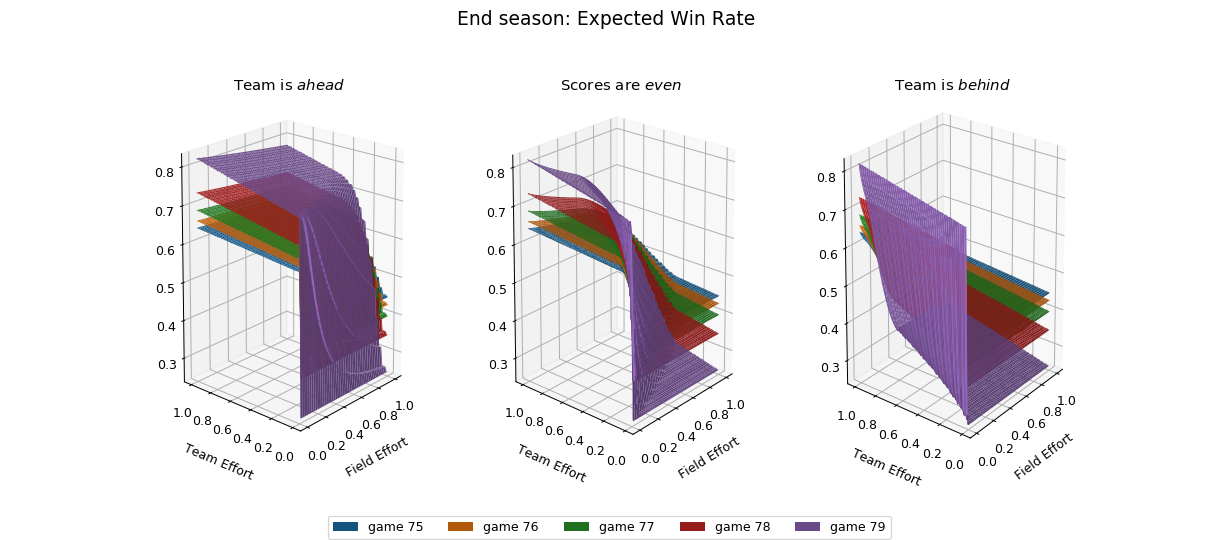

In [177]:
games = [75, 76, 77, 78, 79]   ## Array consisting of the games to be plotted.
adv_ahead , adv_even, adv_behind = 37, 30, 23     ## three advantage scenarios

x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## Advantage: AHEAD
axis_ahead = fig.add_subplot(131,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
axis_ahead.set_title('Team is $ahead$')
for game in games:
    EWR = V[game,adv_ahead,x,y]/(T - game +1)
    my_surface_plot(axis_ahead, E_f[x], E_p[y], EWR, "t = {}".format(game))

## Advantage: EVEN
axis_even = fig.add_subplot(132,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    EWR = V[game,adv_even,x,y]/(T - game +1)
    my_surface_plot(axis_even, E_f[x], E_p[y], EWR, "game {}".format(game))
axis_even.set_title('Scores are $even$')
axis_even.legend(ncol=5, bbox_to_anchor=(1.5, -0.07),  loc = 'best')

## Advantage: BEHIND
axis_behind = fig.add_subplot(133,projection='3d', xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    EWR = V[game,adv_behind,x,y]/(T - game +1)
    my_surface_plot(axis_behind, E_f[x], E_p[y], EWR, "t = {}".format(game))
axis_behind.set_title('Team is $behind$')

fig.suptitle('End season: Expected Win Rate', fontsize=15)
plt.show()

**Remarks:**

-  There is a very large variation in the values of EWR across states when compared to games earlier in the season.
- If the team is well *ahead* or *behind* at the start of Q4, the  strength difference between the teams does not lead to a significant change in EWR; except in the case when, either the team or the field starts with a very low reserve (close to zero). The value of being *ahead* (resp., *behind*) at the start of Q4 is quite  high (resp., low); and increases (resp., decreases) further as one proceeds to the very end of the season.
- If scores are *even* at the start of Q4, the strength difference between the teams plays a key role in determining EWR. Starting the game as the relatively stronger team is more valuable when there are fewer games remaining. On the other hand, the value of starting as the relatively weaker team is increasingly worse, as one heads to the very end of the season.

---


###    Optimal Strategies (effort_usage at Q4)


<IPython.core.display.Javascript object>


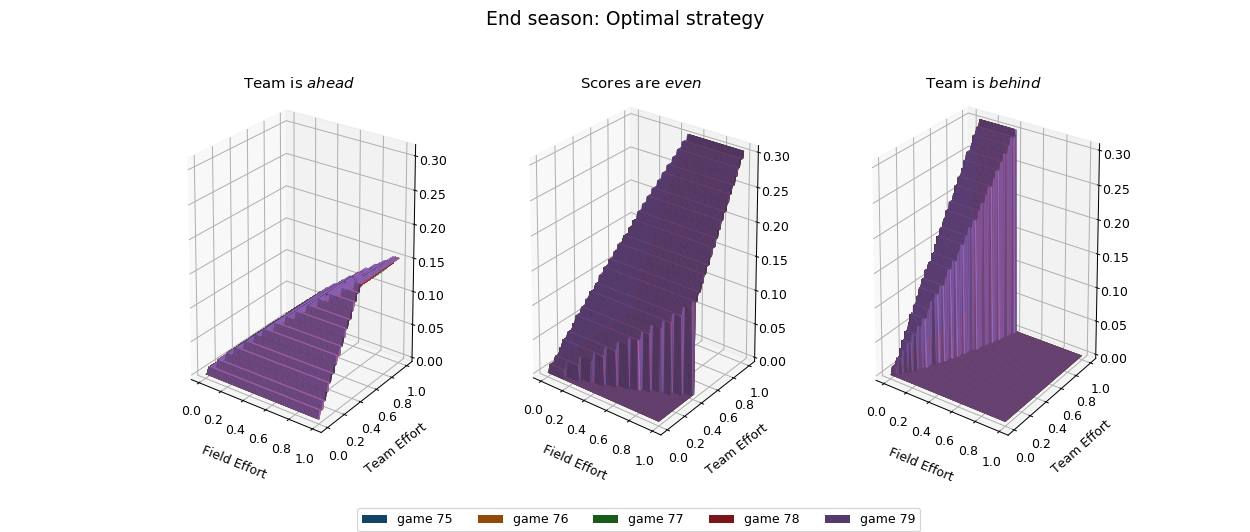

In [178]:
games = [75, 76, 77, 78, 79]   ## Array consisting of the games to be plotted. 
adv_ahead , adv_even, adv_behind = 37, 30, 23     ## three advantage scenarios

x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## Advantage: AHEAD
axis_ahead = fig.add_subplot(131,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
axis_ahead.set_title('Team is $ahead$')
for game in games:
    opt_strategy = strategy[game,adv_ahead,x,y]
    my_surface_plot(axis_ahead, E_f[x], E_p[y], opt_strategy, "t = {}".format(game))
axis_ahead.set_zlim3d(0.0,0.31)
    
## Advantage: EVEN
axis_even = fig.add_subplot(132,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    opt_strategy = strategy[game,adv_even,x,y]
    my_surface_plot(axis_even, E_f[x], E_p[y], opt_strategy, "game {}".format(game))
axis_even.set_title('Scores are $even$')
axis_even.legend(ncol=5, bbox_to_anchor=(1.5, -0.07),  loc = 'best')

## Advantage: BEHIND
axis_behind = fig.add_subplot(133,projection='3d', xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    opt_strategy = strategy[game,adv_behind,x,y]
    my_surface_plot(axis_behind, E_f[x], E_p[y], opt_strategy, "t = {}".format(game))
axis_behind.set_title('Team is $behind$')

fig.suptitle('End season: Optimal strategy', fontsize=15)

plt.show()

**Remarks:**
- The optimal strategy is quite insensitive to which game we consider even towards the very end of the season. 
- Optimal energy saving decision in Q4 is similar to what we observed for games earlier in the season.

---